<a href="https://colab.research.google.com/github/JulesPrieux/py_project/blob/main/Projet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project


# Settings


In [ ]:
#Librairies
import pandas as pd
import tweepy as tw
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import datetime
import plotly
import yfinance

#API Keys
CONSUMER_KEY = 'S9eO1ZKwGW0zuF4SK71fhoine'
CONSUMER_SECRET = 'EeH5TbJvfIe0VgzY6AQxJmdg5SBzLp1rFSfGnUkqCLZxbFxuya'
ACCESS_TOKEN = '1359884187373883402-6q5YcNr0AVwLlF9x1ZXzdTQiPA9vwO'
ACCESS_TOKEN_SECRET = '6ZHO43NGQUx1IGwdnbChpsRP1TEhKNYkShnsCrTvc3doh'

# Define the search term and the DATE_SINCE date as variables
SEARCH_WORDS = "#avax"
DATE_SINCE = "2020-02-14"
NBR_TWEETS = 1000

#Define Positive and Negative keywords to look for
POSITIVE_KEYWORDS = ['buy','long','pump','up','invest','enter','bull','bullish','bottom']
NEGATIVE_KEYWORDS = ['sell','short','dump','down','scam','exit','bear','bearish','top']

 #Define the main variables in the trading strategy
TICKER = 'AVAX-USD'
START = '2021-01-01'
END = '2021-03-01'
SHORT_LOOKBACK_PERIOD = 50
LONG_LOOKBACK_PERIOD = 200
INITIAL_CAPITAL = 10000
NBRE_SHARES = 100
PERIOD = "5d"
INTERVAL="1h"

# Functions


Sentiment analysis


In [ ]:
def search(SEARCH_WORDS,DATE_SINCE,NBR_TWEETS):
  '''
  This is a function is to search Tweets and store them in Df
  Inputs: SEARCH_WORDS, DATE_SINCE and NBR_TWEETS
  Output: the dataframe resulting the search. 
  '''
  auth = tw.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
  api = tw.API(auth,wait_on_rate_limit= True)
  search = tw.Cursor(api.search,
                    q= SEARCH_WORDS + '-filter:retweets',
                     lang='en',).items(NBR_TWEETS)

  time_tweet = [[tweet.created_at,tweet.text] for tweet in search]
  df_tweets = pd.DataFrame(data=time_tweet,
                           columns=['time','tweet'])
  return df_tweets

In [ ]:
def compute_sentiment_value(df):
  '''
  This is a function is made for Data Analysis. It counts the occurence of keywords in the tweets and return a value between -100% and +100%.
  Inputs: previous dataframe.
  Output: a value between -100% and +100% 
  '''
  sentiment_value = 0

  for i in range(len(df)):
    for keywords in POSITIVE_KEYWORDS: 
      sentiment_value += df['tweet'][i].count(keywords)
      for keywords in NEGATIVE_KEYWORDS:
          sentiment_value -= df['tweet'][i].count(keywords)
  return sentiment_value


def sentiment_value_filter(sentiment_value):
  '''
  This is a function that takes the value 1 if sentiment > 10% , -1 if sentiment < -10%, else = 0
  Inputs: the previous sentiment value. 
  Output: 0 or 1.
  '''
  if sentiment_value > 0.01:
    sentiment_filter = 1
  elif sentiment_value < -0.01:
    sentiment_filter = -1
  else:
     sentiment_filter = 0 
  return sentiment_filter


def sentiment_evolution(df):
  '''
  This is a function that counts the keywords in each row of the df and create a new df to store the count row by row
  Inputs: the previous df
  Output: a df_reverted
  '''
  df_copy = df.copy()
  df_reverted = df_copy.sort_index(axis=1 ,ascending=True)
  counter = 0
  for i in range(len(df_reverted)):
    counter = 0
    for keywords in POSITIVE_KEYWORDS:
       counter += df_reverted['tweet'][i].count(keywords)
    for keywords in NEGATIVE_KEYWORDS:
       counter -= df_reverted['tweet'][i].count(keywords)

    df_reverted['tweet'][i] = counter 
  df_reverted.columns = ['time','sentiment']
#rename the col
  return df_reverted

Trading Analysis

In [ ]:
def PlotPy(TICKER, PERIOD, INTERVAL):
    '''
    This is a function made for plotting purposes for the MA trading strategy ONLY.
    Inputs: TICKER, START, END
    Output: a plot
    '''
    price = yfinance.download(tickers =TICKER,period = PERIOD, interval=INTERVAL)

    fig = plt.figure()

    ax1 = fig.add_subplot(111, ylabel = 'Price')

    # Plot the closing prices
    ticker_data['Close'].plot(ax=ax1, color = 'b', lw=2)

    # Plot the short and long moving average
    signals[['short_mavg','long_mavg']].plot(ax=ax1, lw=2)

    # Plot the buy signal
    ax1.plot(signals.loc[signals.position == 1.0].index, signals.short_mavg[signals.position == 1.0], marker = '^', markersize = 10, color='g', lw=0)

    # Plot the sell signal
    ax1.plot(signals.loc[signals.position == -1.0].index,signals.short_mavg[signals.position == -1.0], marker = 'v', markersize = 10, color='r', lw=0)

    ax1.legend(loc='best')   
    ax1.grid(axis = "both", linestyle = '--')
    plt.title('AVAX-USD MA-Cross Over Strategy', fontsize = 15)

    plt.show()
    print("Note : This Graph shows the MA strategy whitout the sentiment analysis trading strategy")

In [ ]:
def strategy(signal_value, sentiment_filter): 
    '''
    This function creates the MA + Sentiment Analysis trading strategy.
    Inputs: signal position
            sentiment filter
    Output: the results of the trading strategy.
    '''

    if signal_value == 1 & sentiment_filter == 1:
       print('\x1b[5;32;47m' + "Cross of MA + Positive Market Sentiment = Buy" + '\x1b[0m')
    if signal_value == 1 & sentiment_filter == 0:
      print("Cross of MA + Neutral Market Sentiment : Analyse more thorougly what is happening in the market")
    if signal_value == 1 & sentiment_filter == -1:
      print("Cross of MA + Negative Market Sentiment : Analyse more thorougly what is happening in the market")

    if signal_value == 0 & sentiment_filter == 1:
      print("No Cross of MA + Positive Market Sentiment : Analyse more thorougly what is happening in the market")
    if signal_value == 0 & sentiment_filter == 0:
      print("No cross of MA + Neutral Market Sentiment :Analyse more thorougly what is happening in the market")
    if signal_value == 0 & sentiment_filter == -1:
      print('\x1b[5;31;47m' + "No cross of MA + Negative Market Sentiment : Short" + '\x1b[0m')


# MAIN

In [ ]:
#Initialize API & Store tweets in a Dataframe
df_tweets = search(SEARCH_WORDS,DATE_SINCE,NBR_TWEETS)

In [ ]:
#Sentiment Analysis

#Count the number of positive/negative keywords in tweets and return a value between -100% & +100% to indicate sentiment
sentiment_value = compute_sentiment_value(df_tweets) 

# Give trading signal: 1 for long if sentiment_value > +10% | -1 For short if sentiment < -10% | 0 for neutral 
sentiment_filter = sentiment_value_filter(sentiment_value) 

#Create a new df with sentiment variation stored in each row
df_sentiment_evolution = sentiment_evolution(df_tweets)  

#Plot graph
fig = plotly.express.histogram(df_sentiment_evolution,x='time', y='sentiment',nbins = 60, title='Variation in Sentiment') 

#Show graph
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#SETUPS
ticker_data = yfinance.download(tickers ='AVAX-USD',period = "5d", interval="60m")

# Prepare a signal dataframe with Date same as from TICKER data
signals = pd.DataFrame(index=ticker_data.index)
signals['signal'] = 0.0

# Short moving average
signals['short_mavg'] = ticker_data['Close'].rolling(window=SHORT_LOOKBACK_PERIOD, min_periods=1, center=False).mean()

# Long moving average
signals['long_mavg'] = ticker_data['Close'].rolling(window=LONG_LOOKBACK_PERIOD, min_periods = 1, center=False).mean()

# Identify cross overs : when short moving avg is greater than long moving average
# Value 1 if True, Value 0 if False
signals['signal'][SHORT_LOOKBACK_PERIOD:] = np.where(signals['short_mavg'][SHORT_LOOKBACK_PERIOD:] > signals['long_mavg'][SHORT_LOOKBACK_PERIOD:], 1.0, 0.0) 

signals['position'] = signals['signal'].diff()

signal_value = signals.position.iloc[-1]

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


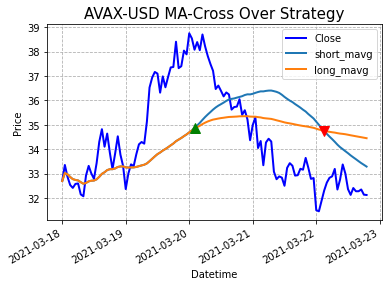

Note : This Graph shows the MA strategy whitout the sentiment analysis trading strategy


In [ ]:
#Test
PlotPy(TICKER, PERIOD, INTERVAL)

In [ ]:
strategy(signal_value, sentiment_filter)

No cross of MA + Neutral Market Sentiment :Analyse more thorougly what is happening in the market
